<a href="https://colab.research.google.com/github/kkimhaji/FlyAI/blob/main/Deep%20Learning/CNN/17_bin_vs_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2클래스 데이터를 다중 분류 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

## 데이터 준비

In [ ]:
# !pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

--2023-01-09 02:09:06--  https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2023-01-09 02:09:07 (85.2 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

In [ ]:
X.head(), y.head()

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  
 0                     0.627   50  
 1                     0.351   31  
 2                     0.672   32  
 3                     0.167   21  
 4                     2.288   33  , 0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64)

In [ ]:
z = diabetes[['Outcome']]
z.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


위처럼 리스트로 칼럼을 입력해서 가져오면 그냥 1차원이 아니라 2차원 dataframe 형태로 읽어오기 때문에 z = z.vales로 Series 형태로 바꿔주거나 처음부터 읽어올 때 리스트가 아니라 개별적으로 가져올 것

In [ ]:
from sklearn.model_selection import train_test_split

# 함수 이름은 train test split이지만 기능 자체는 그냥 하나의 데이터를 두 개로 나누는 것
# 하나만 지정하면 하나가 두 개로 나눠짐
#  X_train, X_test = train_test_split(X, test_size=0.2)

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
655,2,155,52,27,540,38.7,0.240,25
293,1,128,48,45,194,40.5,0.613,24
382,1,109,60,8,182,25.4,0.947,21
591,2,112,78,50,140,39.4,0.175,24
71,5,139,64,35,140,28.6,0.411,26


각 칼럼들은 일반적으로 정규 분포를 따른다는 전제 하에 정규화 진행 


In [ ]:
# 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# transform을 거치고 나면 numpy 배열로 바뀜 (들어갈 땐 Dataframe)
X_train[:5]

array([[-0.57524177,  1.0462012 , -0.84767498,  0.42524208,  4.05341929,
         0.89379196, -0.67676036, -0.69645606],
       [-0.8705582 ,  0.22049668, -1.05198211,  1.57180843,  1.02719366,
         1.13010661,  0.47209341, -0.78189542],
       [-0.8705582 , -0.36055465, -0.4390607 , -0.7850224 ,  0.92223786,
        -0.85231074,  1.50082575, -1.03821352],
       [-0.57524177, -0.26880971,  0.48032142,  1.89029909,  0.55489255,
         0.9856921 , -0.87696276, -0.78189542],
       [ 0.31070751,  0.55689482, -0.23475356,  0.93482713,  0.55489255,
        -0.4321958 , -0.15007405, -0.61101669]])

In [ ]:
X_test = scaler.transform(X_test)
y_test = y_test.values

In [ ]:
def build_model_1():
  model = keras.Sequential([
      # input_shape 대신 input_dim을 쓰기도 함 (dimension의 dim)
      layers.Dense(units=16, activation = 'relu', input_shape=(8, )),
      layers.Dense(8, activation='relu'),
      
      #출력 층
      # 출력은 하나지만 확률로 결과값을 얻고 싶어서 sigmoid 사용 
      layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      optimizer = 'adam', loss='binary_crossentropy',
      metrics=['acc']
  )

  return model

In [ ]:
model = build_model_1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


출력이 하나다 = 회귀

In [ ]:
# 모델 합성
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                epochs = EPOCHS, batch_size = BATCH_SIZE,
                validation_split = 0.2, #미리 만들어둔 validation이 없기 때문에 
                verbose=1
                )

Epoch 1/30
16/16 [==============================] - 1s 15ms/step - loss: 0.6103 - acc: 0.6925 - val_loss: 0.5706 - val_acc: 0.7480
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5852 - acc: 0.7271 - val_loss: 0.5505 - val_acc: 0.7561
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5651 - acc: 0.7393 - val_loss: 0.5345 - val_acc: 0.7561
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5482 - acc: 0.7454 - val_loss: 0.5212 - val_acc: 0.7724
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5336 - acc: 0.7556 - val_loss: 0.5111 - val_acc: 0.7805
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5229 - acc: 0.7617 - val_loss: 0.5018 - val_acc: 0.7886
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5127 - acc: 0.7576 - val_loss: 0.4951 - val_acc: 0.7886
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5033 - acc: 0.7

In [ ]:
# 평가 

model.evaluate(X_train, y_train)
#학습할 때 성능

20/20 [==============================] - 0s 1ms/step - loss: 0.4427 - acc: 0.8062


[0.44273799657821655, 0.8061889410018921]

In [ ]:
model.evaluate(X_test, y_test)
# 학습할 때 본 적 없는 데이터를 만나면 어떻게 나오는지

5/5 [==============================] - 0s 5ms/step - loss: 0.5157 - acc: 0.7615


[0.5157137513160706, 0.7615384459495544]

In [ ]:
# 예측

y_pred = model.predict(X_test)
y_pred[:5]

5/5 [==============================] - 0s 3ms/step


array([[0.731156  ],
       [0.7227728 ],
       [0.0902142 ],
       [0.10521194],
       [0.32855573]], dtype=float32)

In [ ]:
y_pred = y_pred.reshape(-1)
y_pred[:5]

array([0.731156  , 0.7227728 , 0.0902142 , 0.10521194, 0.32855573],
      dtype=float32)

In [ ]:
y_pred = (y_pred>0.5).astype('int')
y_pred[:5]

array([1, 1, 0, 0, 0])

## 다중분류로

- 클래스가 두개인 다중분류

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
def build_model_2():
  model = keras.Sequential([
      # input_shape 대신 input_dim을 쓰기도 함 (dimension의 dim)
      layers.Dense(units=16, activation = 'relu', input_shape=(8, )),
      layers.Dense(8, activation='relu'),
      
      #출력 층
      # 클래스 두 개를 다중분류 이므로 출력 2개 
      layers.Dense(2, activation='softmax')
  ])

  model.compile(
      optimizer = 'adam', loss='categorical_crossentropy',
      metrics=['acc']
  )

  return model

In [ ]:
model = build_model_2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 2)                 18        
                                                                 
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 합성
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh, #one-hot된 걸로 넣기 (다중분류라고 생각하고)
                epochs = EPOCHS, batch_size = BATCH_SIZE,
                validation_split = 0.2, #미리 만들어둔 validation이 없기 때문에 
                verbose=1
                )

Epoch 1/30
16/16 [==============================] - 1s 23ms/step - loss: 0.7195 - acc: 0.6130 - val_loss: 0.7038 - val_acc: 0.6179
Epoch 2/30
16/16 [==============================] - 0s 8ms/step - loss: 0.6821 - acc: 0.6558 - val_loss: 0.6665 - val_acc: 0.6423
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 0.6579 - acc: 0.6741 - val_loss: 0.6390 - val_acc: 0.6504
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6386 - acc: 0.6762 - val_loss: 0.6194 - val_acc: 0.6829
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6220 - acc: 0.6802 - val_loss: 0.6013 - val_acc: 0.6911
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6050 - acc: 0.6823 - val_loss: 0.5846 - val_acc: 0.7073
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5889 - acc: 0.6965 - val_loss: 0.5646 - val_acc: 0.6992
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5732 - acc: 0.7

In [ ]:
model.evaluate(X_train, y_train_oh)

20/20 [==============================] - 0s 4ms/step - loss: 0.4430 - acc: 0.7818


[0.44296175241470337, 0.7817589640617371]

In [ ]:
y_test_oh = to_categorical(y_test)
model.evaluate(X_test, y_test_oh)

5/5 [==============================] - 0s 4ms/step - loss: 0.4784 - acc: 0.7727


[0.47839826345443726, 0.7727272510528564]

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

5/5 [==============================] - 0s 2ms/step


array([[0.36543018, 0.6345698 ],
       [0.5727282 , 0.4272718 ],
       [0.9172732 , 0.08272689],
       [0.8883039 , 0.11169608],
       [0.62845314, 0.3715469 ]], dtype=float32)

다중이기 때문에 0, 1이 아니라 0일 확률과 1일 확률로 나옴

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([1, 0, 0, 0, 0])

# 다중분류에서 one-hot encoding 하지 않고 학습

## 데이터 준비

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
type(X_train)

numpy.ndarray

[36456 39726 35381 30621 71398 75924 34428 62020 52454]


IndexError: ignored

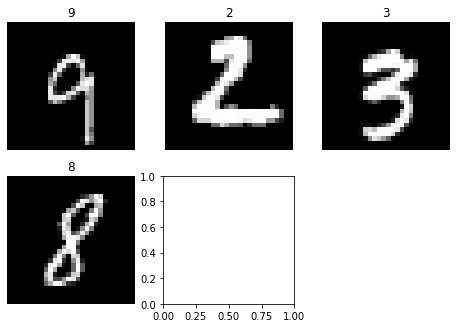

In [ ]:
samples = np.random.randint(80000, size=9)
print(samples)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx], cmap='gray')
  plt.axis('off')
  plt.title(y_train[idx])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28)
(48000,) (12000,)


In [ ]:
# 정규화
#이미지 데이터는 보통 min-max 사용

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_val = X_val.astype('float32')/255


In [ ]:
#다중 분류니까 y를 one-hot

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_val_oh = to_categorical(y_val)

y_train_oh[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
y_train_oh.shape

(48000, 10)

## 모델

In [ ]:
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_val = X_val.reshape(-1, 28,28,1)

In [ ]:
def build_model_3():
  model = keras.Sequential([
      layers.Conv2D(filters = 32, kernel_size = 3, #(n, m): 가로 세로 길이 - 정사각형이 아니어도 됨 but 그런 경우는 거의 없음 그냥 3으로 넣으면 (3, 3)으로 들어감
                    activation='relu', input_shape = (28, 28, 1)),
      layers.MaxPool2D(2), # (2, 2)와 2는 같음 
      layers.Conv2D(filters = 3642, kernel_size = 3,#Conv2D는 뒤로 갈수록 증가하는 게 일반적
                    activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
      
  ])

  model.compile(optimizer = 'adam', loss='categorical_crossentropy',
                metrics=['acc'])
  
  return model

In [ ]:
model = build_model_3()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 3642)      1052538   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 3642)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 91050)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
# 모델 학습
EPOCHS = 10
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh, 
                epochs = EPOCHS, batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                verbose=1
                )

Epoch 1/10
1500/1500 [==============================] - 39s 20ms/step - loss: 0.7465 - acc: 0.9577 - val_loss: 0.1065 - val_acc: 0.9695
Epoch 2/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0650 - acc: 0.9809 - val_loss: 0.0704 - val_acc: 0.9805
Epoch 3/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0441 - acc: 0.9867 - val_loss: 0.0645 - val_acc: 0.9837
Epoch 4/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0340 - acc: 0.9900 - val_loss: 0.0710 - val_acc: 0.9818
Epoch 5/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0329 - acc: 0.9903 - val_loss: 0.0835 - val_acc: 0.9778
Epoch 6/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0800 - val_acc: 0.9815
Epoch 7/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0243 - acc: 0.9927 - val_loss: 0.0679 - val_acc: 0.9856
Epoch 8/10
1500/1500 [==========================

In [ ]:
model.evaluate(X_train, y_train_oh)

1500/1500 [==============================] - 11s 7ms/step - loss: 0.0078 - acc: 0.9975


[0.007836543954908848, 0.9974583387374878]

In [ ]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 2s 7ms/step - loss: 0.0726 - acc: 0.9869


[0.0726008266210556, 0.9868999719619751]

In [ ]:
y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([7, 2, 1, 0, 4])

## without one-hot

In [ ]:
def build_model_4():
  model = keras.Sequential([
      layers.Conv2D(filters = 32, kernel_size = 3, #(n, m): 가로 세로 길이 - 정사각형이 아니어도 됨 but 그런 경우는 거의 없음 그냥 3으로 넣으면 (3, 3)으로 들어감
                    activation='relu', input_shape = (28, 28, 1)),
      layers.MaxPool2D(2), # (2, 2)와 2는 같음 
      layers.Conv2D(filters = 3642, kernel_size = 3,#Conv2D는 뒤로 갈수록 증가하는 게 일반적
                    activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax') #원핫은 하지 않지만 텐서플로가 내부적으로 원핫을 하기 때문에 냅둠
      
  ])

  model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', # sparse 추가 (비용 계산) -> 학습 시 one-hot시킨 데이터 넣으면x (sparse가 있으면 텐서플로가 내부적으로 원핫을 진행)
                metrics=['acc'])
  
  return model

In [ ]:
model = build_model_4()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 3642)      1052538   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 3642)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 91050)             0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [ ]:
# 모델 학습
EPOCHS = 3
BATCH_SIZE = 32

log = model.fit(X_train, y_train, 
                epochs = EPOCHS, batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val),
                verbose=1
                )

Epoch 1/3
1500/1500 [==============================] - 31s 20ms/step - loss: 0.8224 - acc: 0.9573 - val_loss: 0.0870 - val_acc: 0.9743
Epoch 2/3
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0656 - acc: 0.9803 - val_loss: 0.0627 - val_acc: 0.9830
Epoch 3/3
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0435 - acc: 0.9873 - val_loss: 0.0796 - val_acc: 0.9775


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

## 이진분류 -> 다중분류로
- one-hot encoding 하지 않고
- sparse_categorical_crossentropy 사용

## 데이터 준비

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [ ]:
# 각자 실습

model = keras.Sequential([
    layers.Densd(32, activation='relu', input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 이걸로 전이학습 끝

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()


NameError: ignored

In [ ]:
# iterator

data = [1,2,3,4,5]
my_iter = iter(data)
#my_iter 타입 = iterator
i = my_iter.__next__()
print(i)
#5번 반복하면 됨
# for ~ in 구문이 이렇게 동작함

1


In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28)
(48000,) (12000,)


In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_val = X_val.astype('float32')/255

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
type(train_ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [ ]:
train_ds = train_ds.shuffle(buffer_size = 50000).batch(batch_size=32) #buffer_size: X_train의 개수보다 커야 함

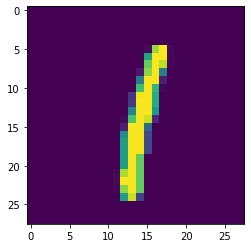

In [ ]:
my_iter = iter(train_ds)
x, y = my_iter.next()

plt.imshow(x[0])
plt.show()

한 번 돌 때마다 batch_size 만큼만 들어옴

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.batch(batch_size = 32) #학습용이 아니기 때문에 셔플할 필요 없음 

In [ ]:
model = build_model_4()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 3642)      1052538   
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 3642)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 91050)             0   

In [ ]:
# 모델 학습
EPOCHS = 3

log = model.fit(train_ds, 
                epochs = EPOCHS,
                validation_data = val_ds,
                verbose=1
                )

Epoch 1/3
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1038 - acc: 0.9682 - val_loss: 0.0502 - val_acc: 0.9836
Epoch 2/3
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0515 - val_acc: 0.9841
Epoch 3/3
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0237 - acc: 0.9925 - val_loss: 0.0534 - val_acc: 0.9831


In [ ]:
# predict

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred)

313/313 [==============================] - 2s 5ms/step


In [ ]:
model.evaluate(train_ds)

1500/1500 [==============================] - 10s 6ms/step - loss: 0.0280 - acc: 0.9907


[0.027985824272036552, 0.9906666874885559]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0461 - acc: 0.9861


[0.04610436037182808, 0.9861000180244446]

# 함수형 API 사용

In [ ]:
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_val = X_val.reshape(-1, 28,28,1)

In [ ]:
def build_model_5():
  inputs = layers.Input(shape=(28,28,1))

  x = layers.Conv2D(filters = 32, kernel_size = 3,
                activation='relu')(inputs)
  x = layers.MaxPool2D(2)(x) # (2, 2)와 2는 같음 
  x = layers.Conv2D(filters = 3642, kernel_size = 3,#Conv2D는 뒤로 갈수록 증가하는 게 일반적
                activation='relu')(x)
  x = layers.MaxPool2D(2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  outputs = layers.Dense(10, activation='softmax')(x) #원핫은 하지 않지만 텐서플로가 내부적으로 원핫을 하기 때문에 냅둠
      
  model = tf.keras.Model(inputs = inputs, outputs = outputs)

  model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', # sparse 추가 (비용 계산) -> 학습 시 one-hot시킨 데이터 넣으면x (sparse가 있으면 텐서플로가 내부적으로 원핫을 진행)
                metrics=['acc'])
  
  return model

In [ ]:
model = build_model_5()
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 3642)      1052538   
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 3642)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 91050)             0   

In [ ]:
# 모델 학습
EPOCHS = 3

log = model.fit(train_ds, 
                epochs = EPOCHS,
                validation_data = val_ds,
                verbose=1
                )

Epoch 1/3
1500/1500 [==============================] - 31s 21ms/step - loss: 0.1007 - acc: 0.9699 - val_loss: 0.0458 - val_acc: 0.9852
Epoch 2/3
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0368 - acc: 0.9884 - val_loss: 0.0426 - val_acc: 0.9872
Epoch 3/3
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0223 - acc: 0.9932 - val_loss: 0.0343 - val_acc: 0.9884


## 서브 클래싱

In [ ]:
# 클래스 형

class MyModel(tf.keras.Model):
  def __init__(self): #레이어 정의
    super(MyModel, self).__init__()
    self.conv1 = layers.Conv2D(32, 3, activation='relu')
    self.conv2 = layers.Conv2D(64, 3, activation='relu')
    self.maxpool = layers.MaxPool2D(2)
    self.flat = layers.Flatten()
    self.dense1 = layers.Dense(256, activation = 'relu')
    self.dense2 = layers.Dense(10, activation = 'softmax')

  def call(self, inputs): # 들어온 입력을 토대로 생성
    x = self.conv1(inputs)
    x = self.maxpool(x)
    x = self.conv2(x)
    x = self.maxpool(x)
    x = self.flat(x)
    x = self.dense1(x)
    output = self.dense2(x)

    return output


In [ ]:
model = MyModel()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
                metrics=['acc'])


In [ ]:
# 모델 학습
EPOCHS = 3
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                epochs = EPOCHS, batch_size = BATCH_SIZE,
                validation_data =(X_val, y_val),
                verbose=1
                )

Epoch 1/3
1500/1500 [==============================] - 6s 4ms/step - loss: 2.0754 - acc: 0.9500 - val_loss: 0.2040 - val_acc: 0.9619
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1455 - acc: 0.9621 - val_loss: 0.1281 - val_acc: 0.9666
Epoch 3/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0911 - acc: 0.9745 - val_loss: 0.0924 - val_acc: 0.9761
